# Logistic Regression with non-linear features

## import library

In [1429]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [1430]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train          = np.genfromtxt(fname_data_train, delimiter=',')
data_test           = np.genfromtxt(fname_data_test, delimiter=',')

number_data_train   = data_train.shape[0]
number_data_test    = data_test.shape[0]

data_train_point    = data_train[:, 0:2]
data_train_point_x  = data_train_point[:, 0]
data_train_point_y  = data_train_point[:, 1]
data_train_label    = data_train[:, 2]

data_test_point     = data_test[:, 0:2]
data_test_point_x   = data_test_point[:, 0]
data_test_point_y   = data_test_point[:, 1]
data_test_label     = data_test[:, 2]

data_train_label_class_0    = (data_train_label == 0)
data_train_label_class_1    = (data_train_label == 1)

data_test_label_class_0     = (data_test_label == 0)
data_test_label_class_1     = (data_test_label == 1)

data_train_point_x_class_0  = data_train_point_x[data_train_label_class_0]
data_train_point_y_class_0  = data_train_point_y[data_train_label_class_0]

data_train_point_x_class_1  = data_train_point_x[data_train_label_class_1]
data_train_point_y_class_1  = data_train_point_y[data_train_label_class_1]

data_test_point_x_class_0   = data_test_point_x[data_test_label_class_0]
data_test_point_y_class_0   = data_test_point_y[data_test_label_class_0]

data_test_point_x_class_1   = data_test_point_x[data_test_label_class_1]
data_test_point_y_class_1   = data_test_point_y[data_test_label_class_1]

print('shape of point in train data = ', data_train_point.shape)
print('shape of point in test data = ', data_train_point.shape)

print('shape of label in train data = ', data_test_label.shape)
print('shape of label in test data = ', data_test_label.shape)

print('data type of point x in train data = ', data_train_point_x.dtype)
print('data type of point y in train data = ', data_train_point_y.dtype)

print('data type of point x in test data = ', data_test_point_x.dtype)
print('data type of point y in test data = ', data_test_point_y.dtype)


shape of point in train data =  (500, 2)
shape of point in test data =  (500, 2)
shape of label in train data =  (500,)
shape of label in test data =  (500,)
data type of point x in train data =  float64
data type of point y in train data =  float64
data type of point x in test data =  float64
data type of point y in test data =  float64


## plot the data

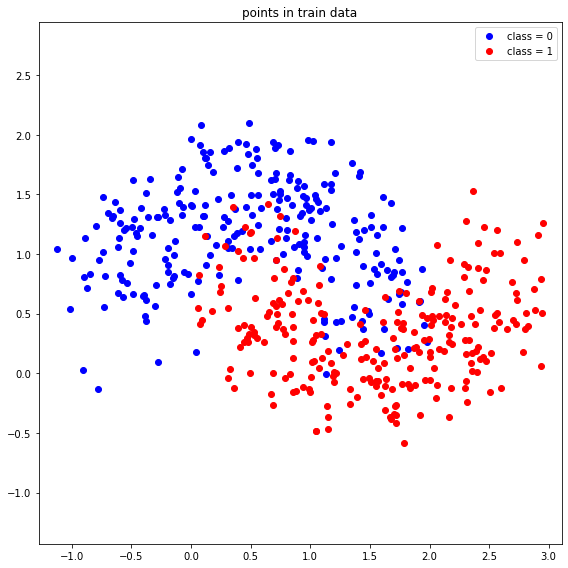

In [1431]:
f = plt.figure(figsize=(8,8))   

plt.title('points in train data')
plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

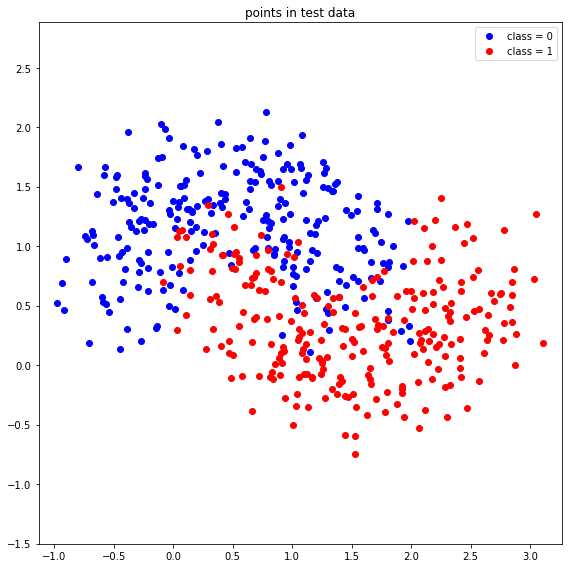

In [1432]:
f = plt.figure(figsize=(8,8))   

plt.title('points in test data')
plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [1433]:
compute_feature(data_train_point[:10,:])

array([[ 1.        , -1.16168563, -0.85058492, -1.33870796],
       [ 1.        , -1.21228615, -0.34865039, -0.40088946],
       [ 1.        ,  0.61993025, -0.74295036, -0.66240368],
       [ 1.        ,  1.48316708, -0.46228884,  0.10160383],
       [ 1.        , -1.18621647, -0.6124262 , -0.68355619],
       [ 1.        ,  1.58082663, -0.68091318, -0.37205626],
       [ 1.        ,  0.16070036, -0.78160374, -0.83615568],
       [ 1.        , -0.49731515,  1.6226588 ,  1.23641027],
       [ 1.        ,  0.55074948,  1.76460249,  1.92299599],
       [ 1.        , -0.33787039,  1.09215633,  1.03275915]])

In [1434]:
a = data_train_point[:10,:]
norm = (a-np.mean(a))/np.std(a)
norm.shape

(10, 2)

In [1435]:
def compute_feature(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # feature = np.ones((len(point), 3))
    # norm = (point-np.mean(point))/np.std(point)
    # feature[:, 1:] = norm
    
    #a = np.ones((len(point), 2))
    norm = (point-np.mean(point))/np.std(point)
    #a[:, 1:] = norm
    
    
    feature = np.ones((len(point), 4))
    #norm = (point-np.mean(point))/np.std(point)
    feature[:, 1:3] = point**2
    feature[:, -1] = np.sqrt(2)*point[:, 0]*point[:, 1]
    feature[:,1] =(feature[:,1]-np.mean(feature[:,1]))/np.std(feature[:,1])
    feature[:,2]=(feature[:,2]-np.mean(feature[:,2]))/np.std(feature[:,2])
    feature[:,-1]=(feature[:,-1]-np.mean(feature[:,-1]))/np.std(feature[:,-1])
    
    ##feature = np.ones((len(point), 8))
    ##feature[:, 1:3] = point**2
    ##feature[:, 3] = np.sqrt(2)*point[:, 0]*point[:, 1]
    ##feature[:, 4] = point[:, 0]*point[:, 1]
    ##feature[:, 5] = point[:, 0]
    ##feature[:, 6] = point[:, 1]
    ##feature[:, 7] = feature[:,1]*feature[:,2]
   
    # feature=np.ones((len(point), 4))
    #for i in range(point.shape[0]):
    #    feature[i,5]= np.dot(point[i, 0],point[i, 1])
        
    #feature[:,4] = np.dot(point[:,0],point[:,1])
    #feature[:,5] = (1+np.dot(point[:,0],point[:,1]))**3
    #feature[:,6] = np.exp(-np.linalg.norm(point[:,0]-point[:,1])**2 / (2*(5**2)))
    
    #print("compute_feature")
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature


## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [1436]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.inner(np.transpose(theta), feature)
    #print("compute_linear_regression")
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [1437]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # comple1te the blanks
    #
    value = 1/(1+np.exp(-z))
    #print("sigmoid")
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [1438]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = sigmoid(compute_linear_regression(theta, feature))
    #print('compute_logistic_regression')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [1439]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta, feature)) - (1-label)*np.log(1-compute_logistic_regression(theta, feature))
    #print("compute_residual")
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [1440]:
def compute_loss(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # +np.inner(np.transpose(theta), theta)
    loss = np.mean(compute_residual(theta, feature, label)) + (alpha/2)*np.inner(np.transpose(theta), theta)
    #print("compute_loss")
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [1441]:
def compute_gradient(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #gradient = (1/feature.shape[0])*(np.dot(np.transpose(feature),compute_logistic_regression(theta, feature)-label) + np.gradient((alpha/2)*np.inner(np.transpose(theta), theta)), 2)
    gradient = (1/feature.shape[0])*(np.dot(np.transpose(feature),compute_logistic_regression(theta, feature)-label)) + alpha*(sum(theta))
    #print('compute_gradient')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [1442]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h = compute_logistic_regression(theta, feature)
    prediction = np.round(h+1)-1    # threshold = 0.5
    correct = prediction == label
    accuracy = np.sum(correct).item() / len(correct)
    #print('compute_accuracy')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [1443]:
number_iteration    = 500 # you can change this value as you want 
learning_rate       = 0.05#0.01 # you can change this value as you want 
number_feature      = 4 #8#2#4 # you can change this value as you want
alpha               = 0.2#1 # you can change this value as you want

theta                       = np.zeros(number_feature)
loss_iteration_train        = np.zeros(number_iteration)
loss_iteration_test         = np.zeros(number_iteration)
accuracy_iteration_train    = np.zeros(number_iteration)
accuracy_iteration_test     = np.zeros(number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [1444]:
for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta           = theta-learning_rate*compute_gradient(theta, compute_feature(data_train_point), data_train_label, alpha)
    #print("theta")
    loss_train      = compute_loss(theta, compute_feature(data_train_point), data_train_label, alpha)
    #print('loss_train')
    loss_test       = compute_loss(theta, compute_feature(data_test_point), data_test_label, alpha)
    #print('loss_test')
    accuracy_train  = compute_accuracy(theta, compute_feature(data_train_point), data_train_label)
    #print('accuracy_train')
    accuracy_test   = compute_accuracy(theta, compute_feature(data_test_point), data_test_label)
    #print(accuracy_test)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    loss_iteration_train[i]     = loss_train
    loss_iteration_test[i]      = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i]  = accuracy_test

theta_optimal = theta

___

___

## functions for presenting the results

___

___

In [1445]:
def function_result_01():

    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))

In [1446]:
def function_result_02():

    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))

In [1447]:
def function_result_03():
    
    plt.figure(figsize=(8,6))
    plt.title('training loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [1448]:
def function_result_04():

    plt.figure(figsize=(8,6))
    plt.title('testing loss')

    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [1449]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('training accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [1450]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('testing accuracy')

    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [1451]:
compute_linear_regression(theta_optimal, compute_feature(data_train_point)).shape
data_train_point_x.shape

(500,)

In [1452]:
def function_result_07():

    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.plot(data_train_point, compute_linear_regression(theta_optimal, compute_feature(data_train_point)))
    
    Z = compute_linear_regression(theta_optimal, compute_feature(np.c_[XX.ravel(), YY.ravel()]))
    Z = Z.reshape(XX.shape)
    #plt.contourf(XX,YY,Z)
    c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r") 
    plt.colorbar(c)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [1453]:
def function_result_08():
    
    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the testing data')
    
    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1)
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Z = compute_linear_regression(theta_optimal, compute_feature(np.c_[XX.ravel(), YY.ravel()]))
    Z = Z.reshape(XX.shape)
    #plt.contourf(XX,YY,Z)
    c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r") 
    plt.colorbar(c)
    plt.plot(data_test_point, compute_linear_regression(theta_optimal, compute_feature(data_test_point)))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [1454]:
def function_result_09():

    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Z = compute_logistic_regression(theta_optimal, compute_feature(np.c_[XX.ravel(), YY.ravel()]))
    Z = Z.reshape(XX.shape)
    #plt.contourf(XX,YY,Z)
    c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r") 
    plt.colorbar(c)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [1455]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the testing data')

    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Z = compute_logistic_regression(theta_optimal, compute_feature(np.c_[XX.ravel(), YY.ravel()]))
    Z = Z.reshape(XX.shape)
    #plt.contourf(XX,YY,Z)
    c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r") 
    plt.colorbar(c)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final training accuracy =  0.8400000000
**************************************************
## [RESULT 02]
**************************************************
final testing accuracy =  0.8060000000
**************************************************
## [RESULT 03]
**************************************************


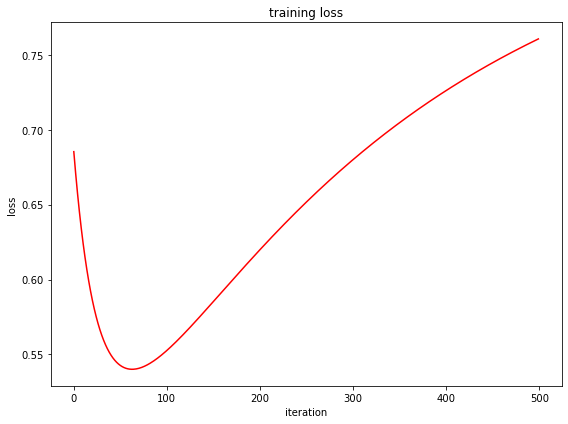

**************************************************
## [RESULT 04]
**************************************************


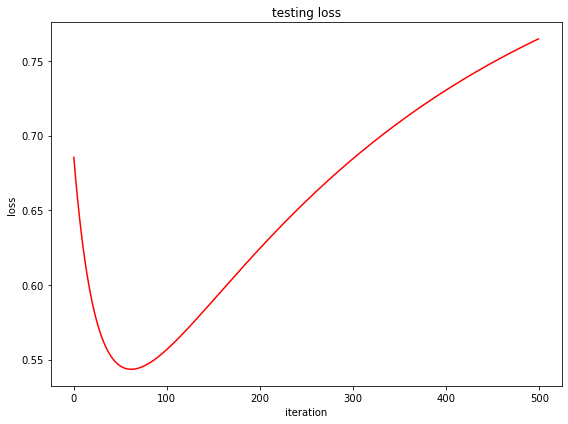

**************************************************
## [RESULT 05]
**************************************************


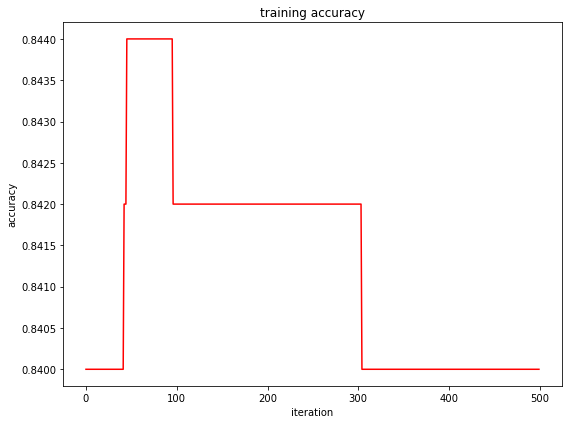

**************************************************
## [RESULT 06]
**************************************************


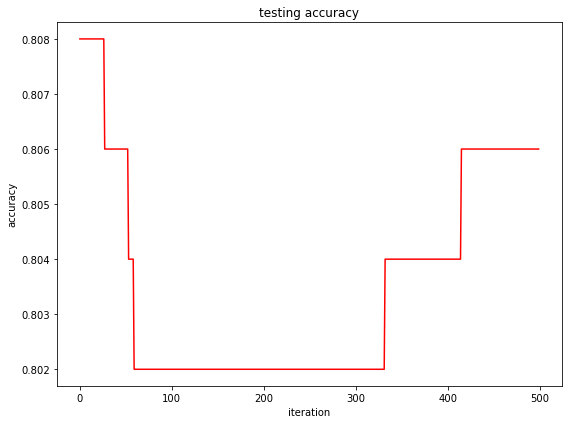

**************************************************
## [RESULT 07]
**************************************************


<ipython-input-1452-91b114501338>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r")


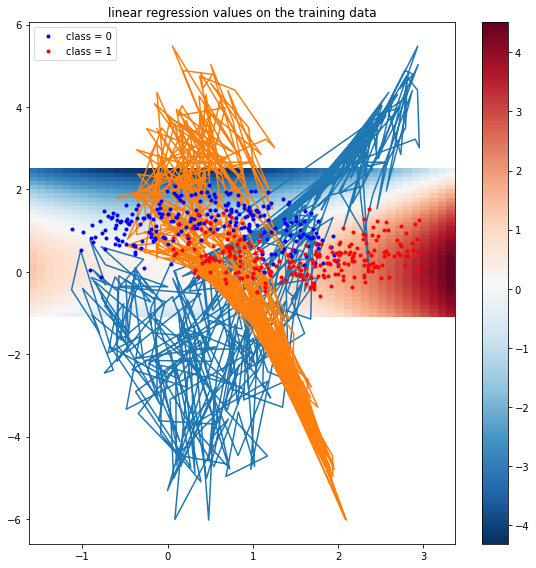

**************************************************
## [RESULT 08]
**************************************************


<ipython-input-1453-81449f64ab19>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r")


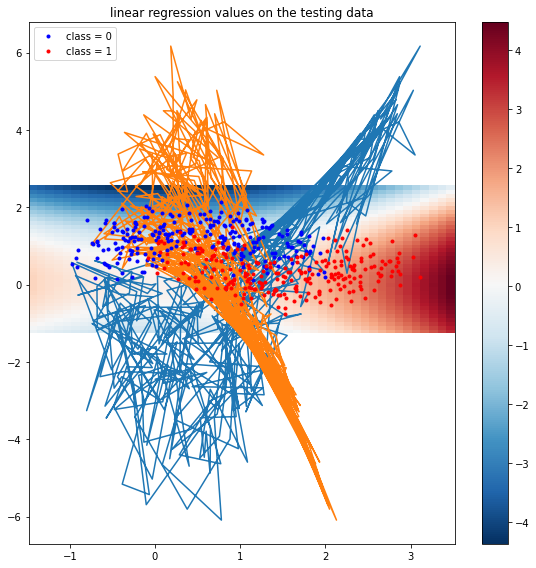

**************************************************
## [RESULT 09]
**************************************************


<ipython-input-1454-9844d25f151a>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r")


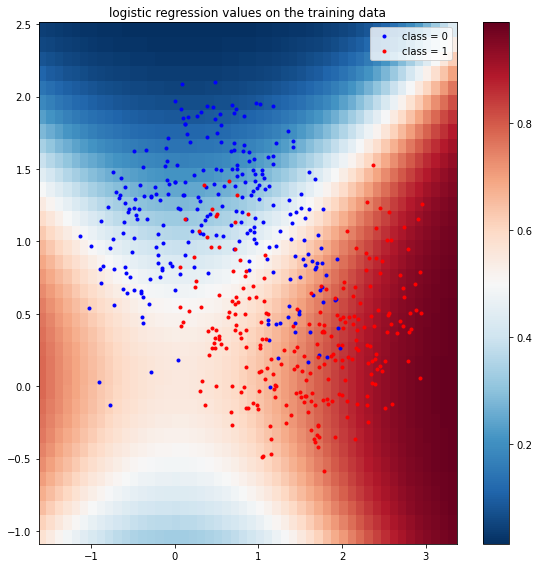

**************************************************
## [RESULT 10]
**************************************************


<ipython-input-1455-a63d69c4901c>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(XX,YY,Z, cmap="RdBu_r")


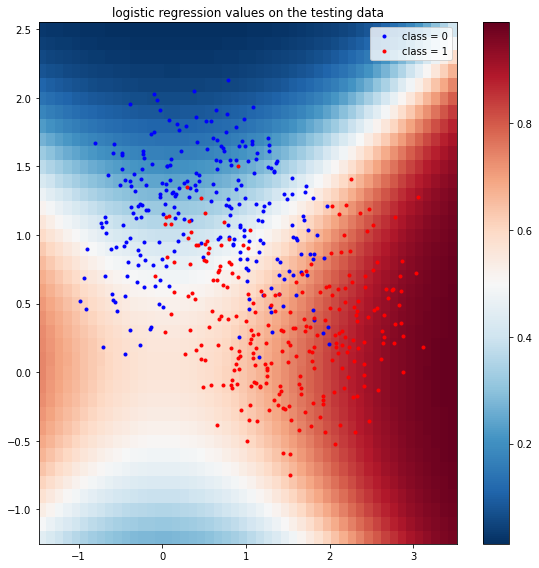

In [1456]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)